In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
import random



In [2]:
mse_list_linear = []
mse_list_cyclic = []
mse_list_en = []
mse_list_filtered = []

for i in range(100):
    print ("Iteration number: " +str(i))
    B = simulate_window_linear(ngenes=500, ncells=200, w=0.2)  # Create linear signal
    B = gene_normalization(B)
    E  , perm = get_perm(B.shape[0]) #Store the true permutation of the linear signal
    B = E.dot(B)
    perm = Perm_to_range(E)
    A = simulate_spatial_cyclic(ngenes=500, ncells=B.shape[0], w=0.2)  # Create cyclic signal
    A = gene_normalization(A)
    noise = np.random.normal(0, 1e-2, A.shape)
    C = A + B
    C = C + noise
    C = np.clip(C, a_max=np.inf, a_min=0)
    E , E_rec = reconstruction_cyclic(C,iterNum=150 , verbose=False) #Reconstruction
    C = E_rec.dot(C)
    A = E_rec.dot(A)
    B = E_rec.dot(B)
    mse_list_cyclic.append(np.linalg.norm(C-A)) #Pre enhancement MSE
    mse_list_linear.append(np.linalg.norm(C-B)) #Pre Filtering MSE
    F = enhancement_cyclic(C,regu=1e-1 , iterNum=100 , verbosity=1000)
    D = F*C
    F = filtering_cyclic(C,regu=1e-3, iterNum=1000 , verbosity=1000)
    K = F*C
    mse_list_en.append(np.linalg.norm(D-A)) #Post enhancement MSE
    mse_list_filtered.append(np.linalg.norm(K-B)) #Post Filtering MSE



Iteration number: 0
Iteration number: 
1
function value: 
1205.7995912361916
starting filtering
Iteration number: 1
Iteration number: 
1
function value: 
1184.3664489064583
starting filtering
Iteration number: 2
Iteration number: 
1
function value: 
1222.053444275547
starting filtering
Iteration number: 3
Iteration number: 
1
function value: 
1231.9238561652523
starting filtering
Iteration number: 4
Iteration number: 
1
function value: 
998.2288884636812
starting filtering
Iteration number: 5
Iteration number: 
1
function value: 
1215.4485743459788
starting filtering
Iteration number: 6
Iteration number: 
1
function value: 
1066.0642461608356
starting filtering
Iteration number: 7
Iteration number: 
1
function value: 
1253.5501255255328
starting filtering
Iteration number: 8
Iteration number: 
1
function value: 
1228.4014981304945
starting filtering
Iteration number: 9
Iteration number: 
1
function value: 
1262.3627696568344
starting filtering
Iteration number: 10
Iteration number: 
1


starting filtering
Iteration number: 85
Iteration number: 
1
function value: 
1276.0962874319875
starting filtering
Iteration number: 86
Iteration number: 
1
function value: 
1057.6547265738002
starting filtering
Iteration number: 87
Iteration number: 
1
function value: 
1332.8455288261446
starting filtering
Iteration number: 88
Iteration number: 
1
function value: 
1089.3368270382207
starting filtering
Iteration number: 89
Iteration number: 
1
function value: 
1187.7498984847684
starting filtering
Iteration number: 90
Iteration number: 
1
function value: 
1245.004212699115
starting filtering
Iteration number: 91
Iteration number: 
1
function value: 
1260.818571027414
starting filtering
Iteration number: 92
Iteration number: 
1
function value: 
1242.8133128212685
starting filtering
Iteration number: 93
Iteration number: 
1
function value: 
1109.1148848622952
starting filtering
Iteration number: 94
Iteration number: 
1
function value: 
1063.3399602206102
starting filtering
Iteration num

In [3]:
mse_list_linear_gr = []
mse_list_cyclic_gr = []
mse_list_en_gr = []
mse_list_filtered_gr = []

for i in range(100):
    print ("Iteration number: " +str(i))
    B = simulate_window_linear(ngenes=500, ncells=200, w=0.2)  # Create linear signal
    B = gene_normalization(B)
    E  , perm = get_perm(B.shape[0]) #Store the true permutation of the linear signal
    B = E.dot(B)
    perm = Perm_to_range(E)
    A = simulate_spatial_cyclic(ngenes=500, ncells=B.shape[0], w=0.2)  # Create cyclic signal
    A = gene_normalization(A)
    noise = np.random.normal(0, 1e-2, A.shape)
    C = A + B
    C = C + noise
    C = np.clip(C, a_max=np.inf, a_min=0)
    mse_list_cyclic_gr.append(np.linalg.norm(C-A)) #Pre enhancement MSE
    mse_list_linear_gr.append(np.linalg.norm(C-B)) #Pre Filtering MSE
    F = enhancement_cyclic(C,regu=1e-1 , iterNum=100 , verbosity=1000)
    D = F*C
    F = filtering_cyclic(C,regu=1e-3, iterNum=1000 , verbosity=1000)
    K = F*C
    mse_list_en_gr.append(np.linalg.norm(D-A)) #Post enhancement MSE
    mse_list_filtered_gr.append(np.linalg.norm(K-B)) #Post Filtering MSE



Iteration number: 0
Iteration number: 
1
function value: 
1325.6670201602992
starting filtering
Iteration number: 1
Iteration number: 
1
function value: 
1277.099085742445
starting filtering
Iteration number: 2
Iteration number: 
1
function value: 
1289.4468964459768
starting filtering
Iteration number: 3
Iteration number: 
1
function value: 
1266.642949582502
starting filtering
Iteration number: 4
Iteration number: 
1
function value: 
1297.5319819296428
starting filtering
Iteration number: 5
Iteration number: 
1
function value: 
1297.3511138343501
starting filtering
Iteration number: 6
Iteration number: 
1
function value: 
1277.7206443621722
starting filtering
Iteration number: 7
Iteration number: 
1
function value: 
1280.5830826079364
starting filtering
Iteration number: 8
Iteration number: 
1
function value: 
1289.8491705569277
starting filtering
Iteration number: 9
Iteration number: 
1
function value: 
1295.5035004770311
starting filtering
Iteration number: 10
Iteration number: 
1


Iteration number: 85
Iteration number: 
1
function value: 
1305.310242084449
starting filtering
Iteration number: 86
Iteration number: 
1
function value: 
1304.4372935652416
starting filtering
Iteration number: 87
Iteration number: 
1
function value: 
1313.853952180679
starting filtering
Iteration number: 88
Iteration number: 
1
function value: 
1291.0244377661875
starting filtering
Iteration number: 89
Iteration number: 
1
function value: 
1302.1395017397526
starting filtering
Iteration number: 90
Iteration number: 
1
function value: 
1296.678804292632
starting filtering
Iteration number: 91
Iteration number: 
1
function value: 
1281.828361455448
starting filtering
Iteration number: 92
Iteration number: 
1
function value: 
1270.9097447521813
starting filtering
Iteration number: 93
Iteration number: 
1
function value: 
1310.3026575829124
starting filtering
Iteration number: 94
Iteration number: 
1
function value: 
1289.1484641148802
starting filtering
Iteration number: 95
Iteration num

In [4]:
with open('simulated/mse_en_gr.npy', 'wb') as f:
    np.save(f,np.array(mse_list_en_gr))
with open('simulated/mse_filtered_gr.npy', 'wb') as f:
    np.save(f,np.array(mse_list_filtered_gr))
with open('simulated/mse_linear.npy', 'wb') as f:
    np.save(f,np.array(mse_list_linear))
with open('simulated/mse_cyclic.npy', 'wb') as f:
    np.save(f,np.array(mse_list_cyclic))
with open('simulated/mse_en.npy', 'wb') as f:
    np.save(f,np.array(mse_list_en))
with open('simulated/mse_filtered.npy', 'wb') as f:
    np.save(f,np.array(mse_list_filtered))



In [18]:
mse_cyclum_en = np.load("simulated/mse_list_en_cyclum.npy")
print(str(np.mean(mse_cyclum_en)) + "Mean mse_cyclum_en")
mse_cyclum_filtered = np.load("simulated/mse_list_filtered_cyclum.npy")
print(str(np.mean(mse_cyclum_filtered)) + "Mean mse_cyclum_filtered")
mse_en = np.load("simulated/mse_en.npy")
print(str(np.mean(mse_en)) + "Mean mse_en")
mse_filtered = np.load("simulated/mse_filtered.npy")
print(str(np.mean(mse_filtered)) + "Mean mse_filtered")
mse_en_gr = np.load("simulated/mse_en_gr.npy")
print(str(np.mean(mse_en_gr)) + "Mean mse_en_gr")
mse_filtered_gr = np.load("simulated/mse_filtered_gr.npy")
print(str(np.mean(mse_filtered_gr)) + "Mean mse_filtered_gr")
mse_linear = np.load("simulated/mse_linear.npy")
print(str(np.mean(mse_linear)) + "Mean mse_linear")
mse_cyclic = np.load("simulated/mse_cyclic.npy")
print(str(np.mean(mse_cyclic)) + "Mean mse_cyclic")


22.719538943171774Mean mse_cyclum_en
16.40256149853086Mean mse_cyclum_filtered
13.862594279393251Mean mse_en
14.895779516070759Mean mse_filtered
12.577051137272619Mean mse_en_gr
13.372786681470052Mean mse_filtered_gr
22.508435892735815Mean mse_linear
22.463715585869195Mean mse_cyclic


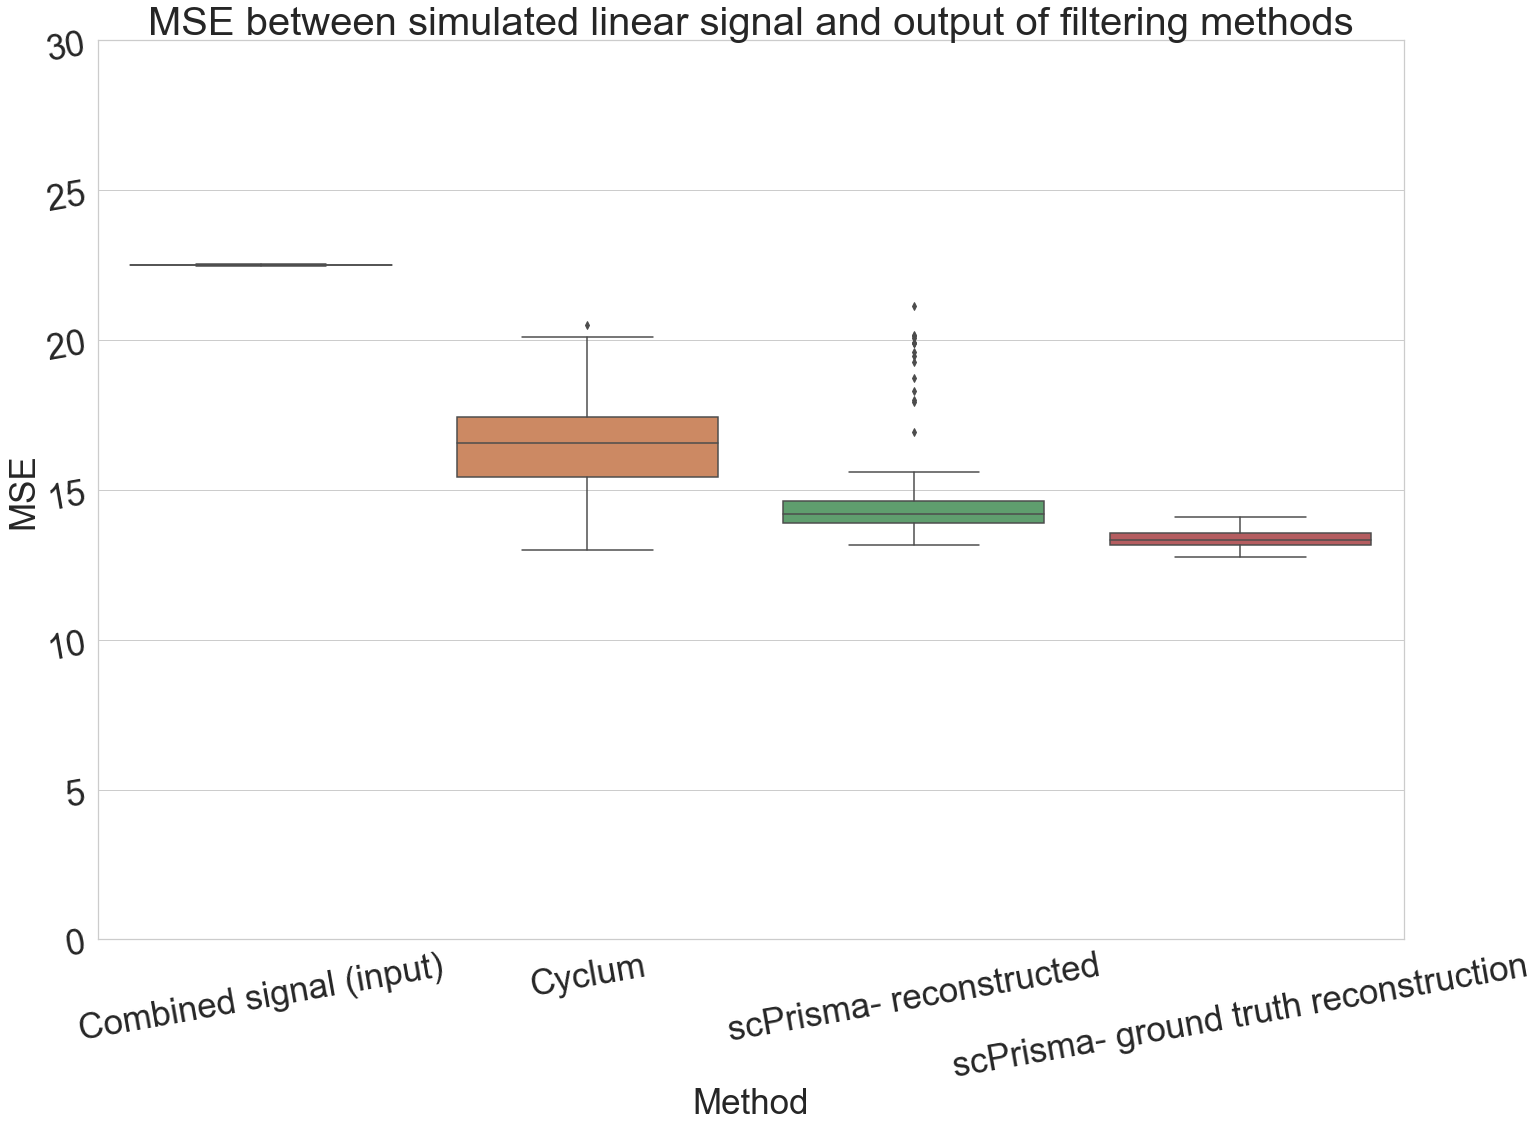

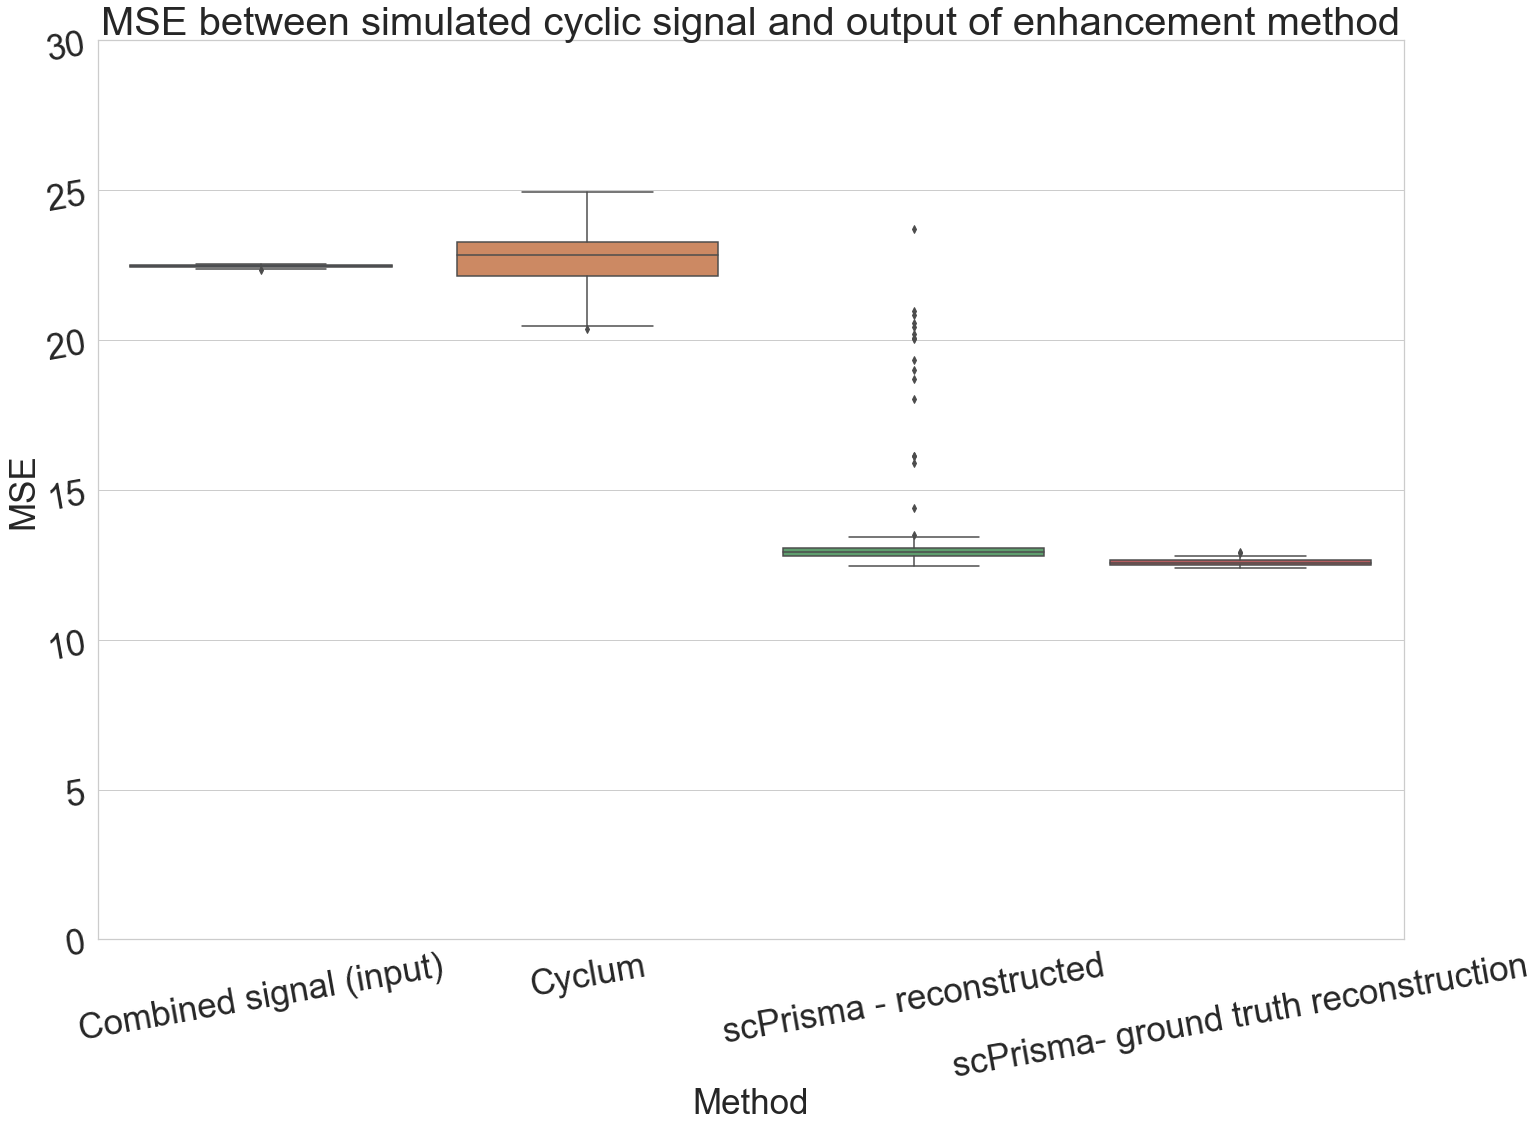

In [19]:
sns.set(rc={'figure.figsize':(23.4,16.54)})

data_linear = pd.DataFrame(
{'Combined signal (input)': mse_linear,
'Cyclum': mse_cyclum_filtered,
 'scPrisma- reconstructed': mse_filtered,
 'scPrisma- ground truth reconstruction': mse_filtered_gr
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_linear)
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated linear signal and output of filtering methods",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
plt.ylim(0, 30)

#plt.xlabel("Method")
#plt.ylabel("MSE")
#plt.title("MSE between simulated linear signal and output of filtering methods",fontsize='24')
plt.show()
data_cyclic= pd.DataFrame(
{'Combined signal (input)': mse_cyclic,
'Cyclum': mse_cyclum_en,
 'scPrisma - reconstructed': mse_en,
 'scPrisma- ground truth reconstruction': mse_en_gr
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_cyclic)
#b.axes.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated cyclic signal and output of enhancement method",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
#b.axes.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.ylim(0, 30)


sns.set(rc={'figure.figsize':(23.4,16.54)})
#plt.title("MSE between simulated cyclic signal and output of enhancement methods" ,fontsize='24')

sns.set_style("whitegrid")

plt.show()

In [20]:
num_of_samples=500*200

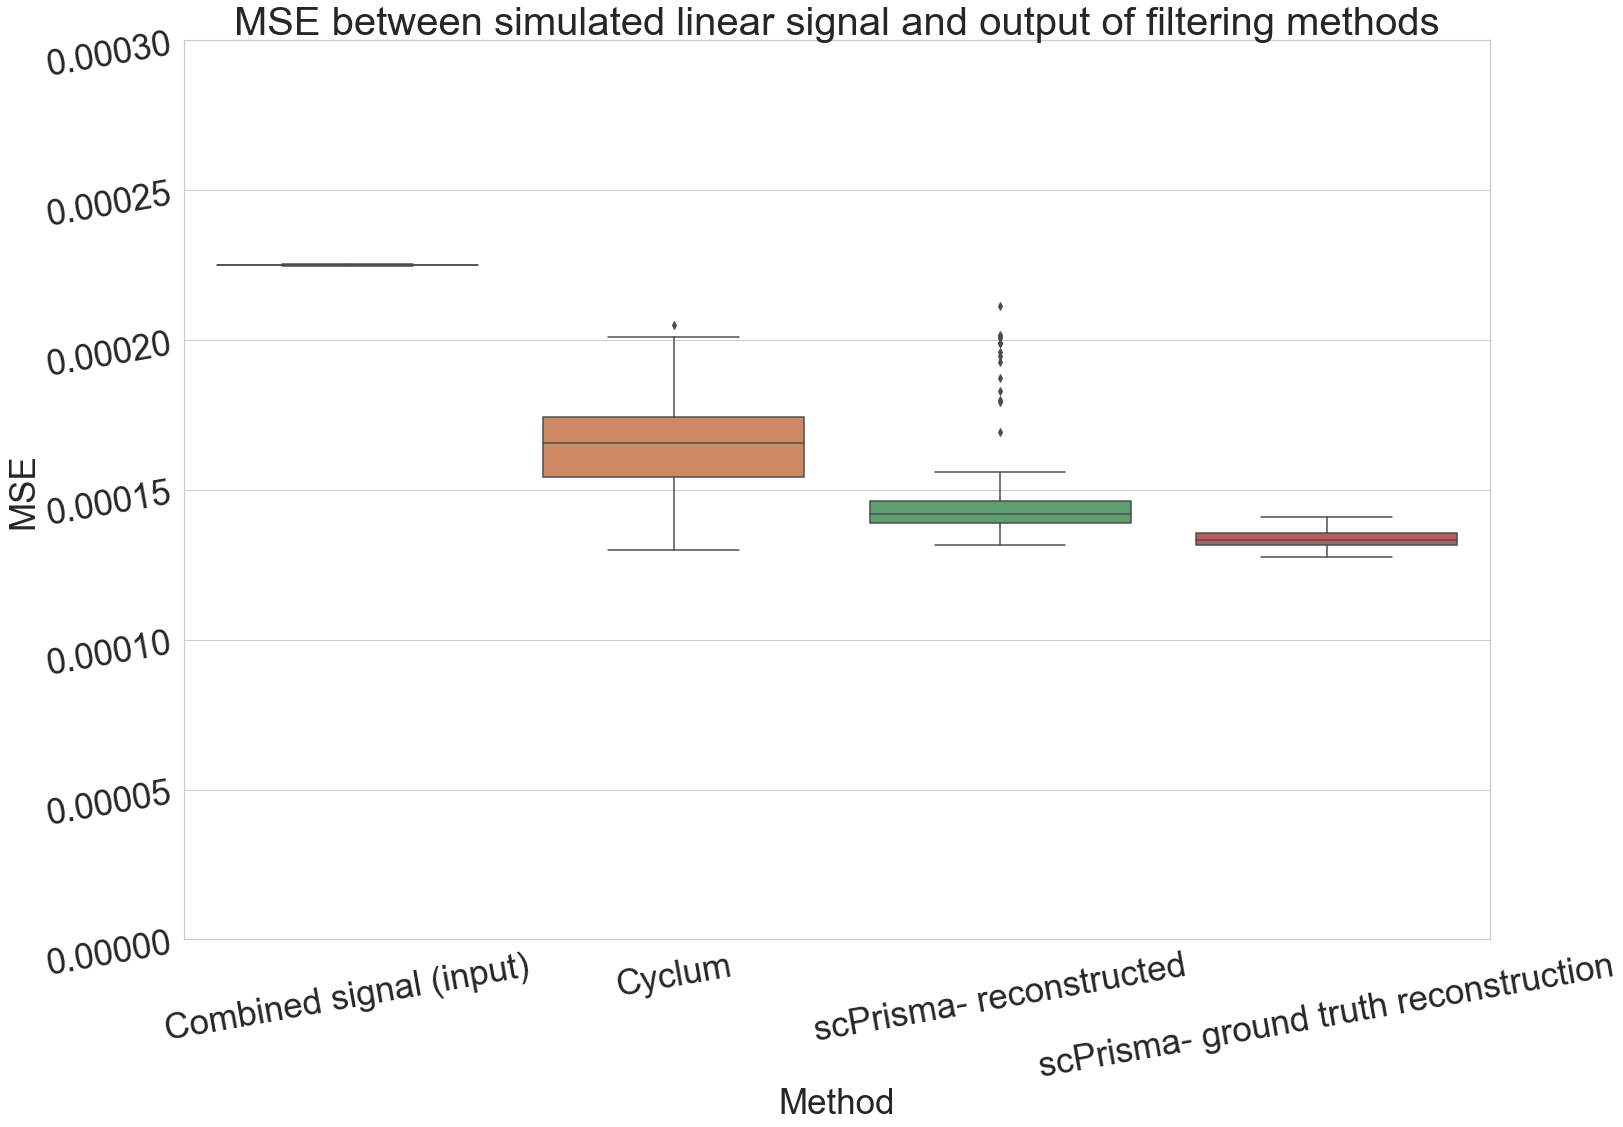

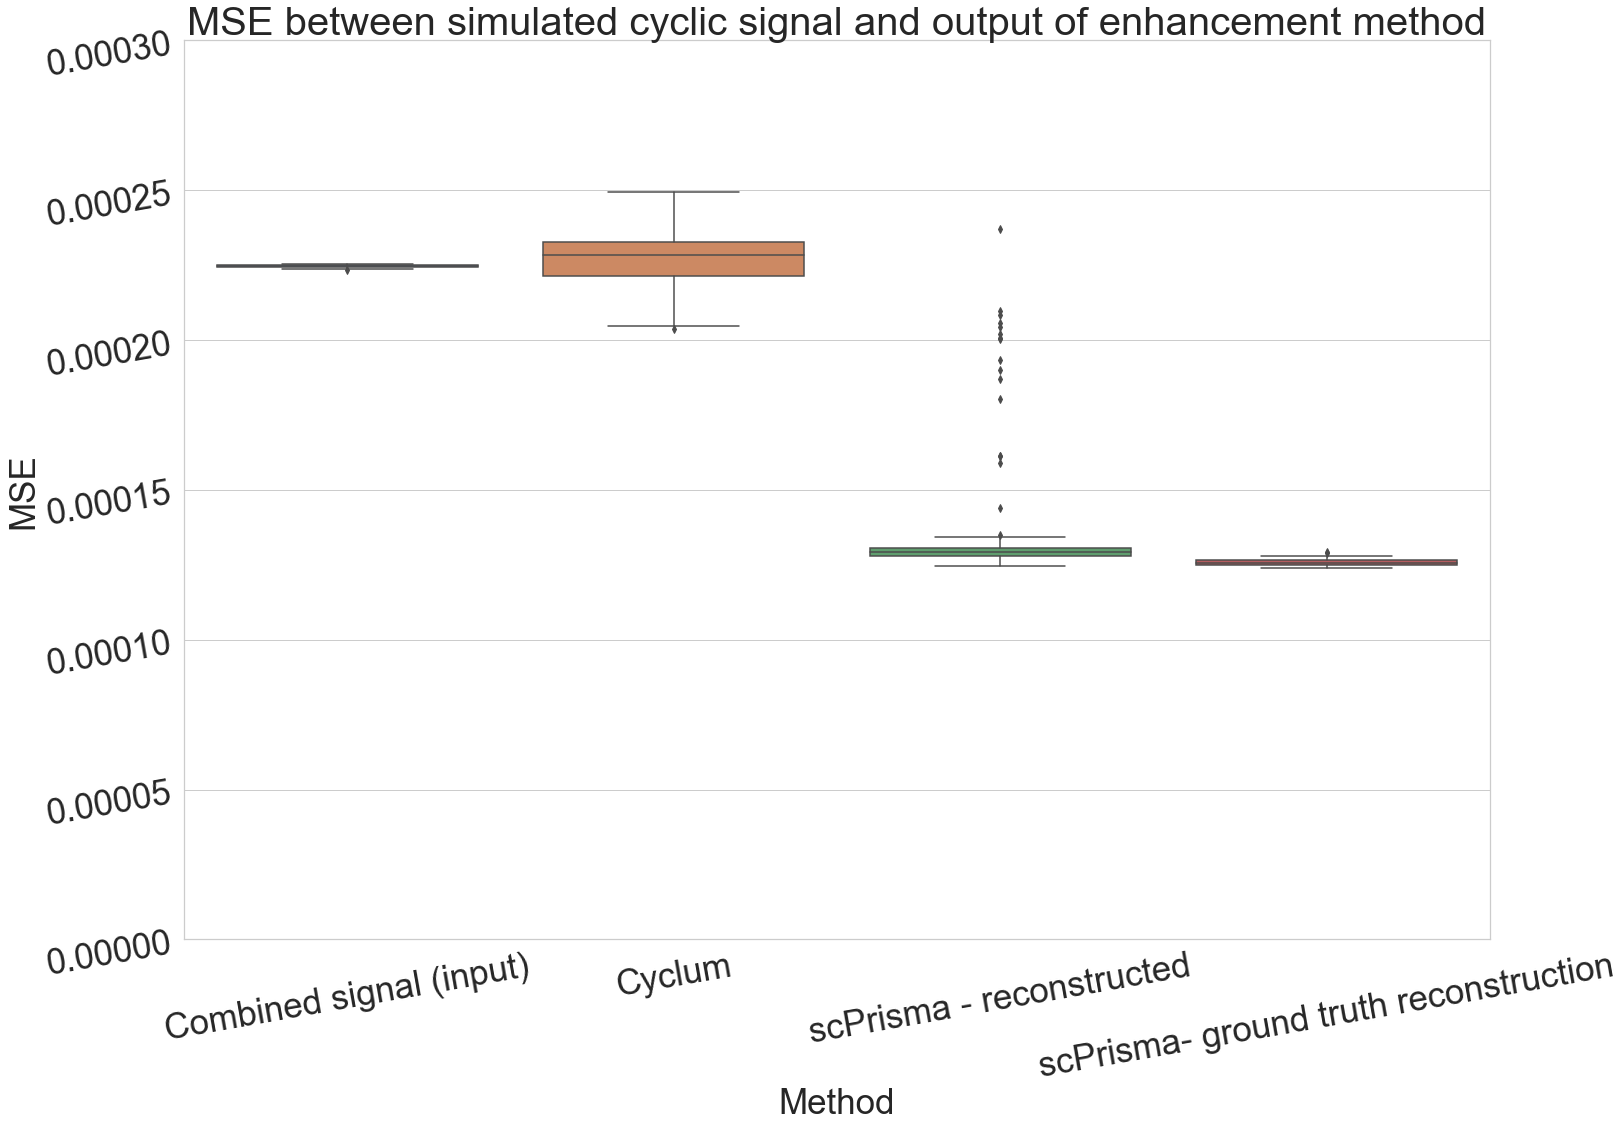

In [21]:
sns.set(rc={'figure.figsize':(23.4,16.54)})

data_linear = pd.DataFrame(
{'Combined signal (input)': mse_linear/num_of_samples,
'Cyclum': mse_cyclum_filtered/num_of_samples,
 'scPrisma- reconstructed': mse_filtered/num_of_samples,
 'scPrisma- ground truth reconstruction': mse_filtered_gr/num_of_samples
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_linear)
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated linear signal and output of filtering methods",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
plt.ylim(0, 3e-4)

#plt.xlabel("Method")
#plt.ylabel("MSE")
#plt.title("MSE between simulated linear signal and output of filtering methods",fontsize='24')
plt.show()
data_cyclic= pd.DataFrame(
{'Combined signal (input)': mse_cyclic/num_of_samples,
'Cyclum': mse_cyclum_en/num_of_samples,
 'scPrisma - reconstructed': mse_en/num_of_samples,
 'scPrisma- ground truth reconstruction': mse_en_gr/num_of_samples
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_cyclic)
#b.axes.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated cyclic signal and output of enhancement method",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
#b.axes.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.ylim(0, 3e-4)


sns.set(rc={'figure.figsize':(23.4,16.54)})
#plt.title("MSE between simulated cyclic signal and output of enhancement methods" ,fontsize='24')

sns.set_style("whitegrid")

plt.show()